In [1]:
!pip install pandas scikit-learn matplotlib seaborn


In [3]:
from google.colab import files
uploaded=files.upload()

Saving employee_salary_data.csv to employee_salary_data.csv


In [4]:
import pandas as pd

df = pd.read_csv("employee_salary_data.csv")
df.head()


,age,experience,education_level,department,salary
0,22,1,Bachelors,HR,25000
1,25,2,Masters,IT,32000
2,28,3,Bachelors,Finance,40000
3,30,5,Masters,IT,45000
4,35,7,PhD,R&D,60000


In [6]:

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (10, 5)

Columns: ['age', 'experience', 'education_level', 'department', 'salary']

Data Types:
 age                 int64
experience          int64
education_level    object
department         object
salary              int64
dtype: object

Missing Values:
 age                0
experience         0
education_level    0
department         0
salary             0
dtype: int64


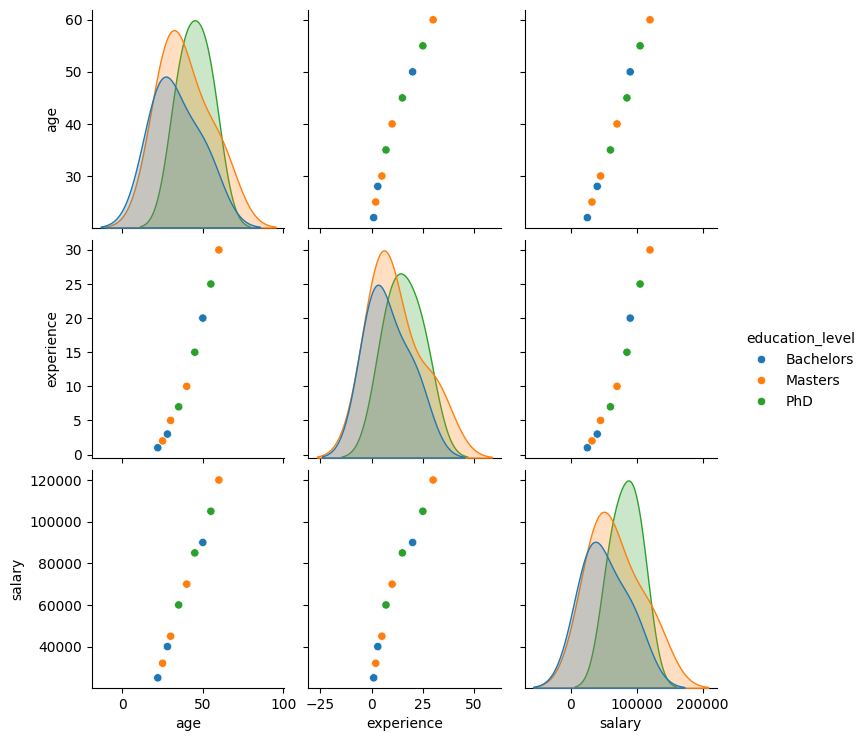

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="education_level")
plt.show()

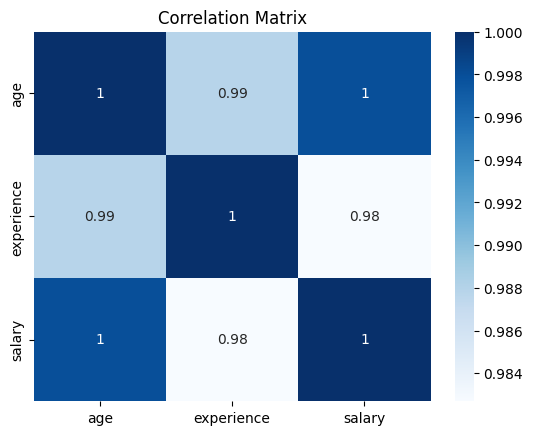

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

le_edu = LabelEncoder()
le_dept = LabelEncoder()

df["education_level"] = le_edu.fit_transform(df["education_level"])
df["department"] = le_dept.fit_transform(df["department"])

df.head()


,age,experience,education_level,department,salary
0,22,1,0,1,25000
1,25,2,1,2,32000
2,28,3,0,0,40000
3,30,5,1,2,45000
4,35,7,2,3,60000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop("salary", axis=1)
y = df["salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 54900000.0


In [12]:

new_data = pd.DataFrame([[28, 3, le_edu.transform(['Bachelors'])[0], le_dept.transform(['Finance'])[0]]],
                        columns=X.columns)
predicted_salary = model.predict(new_data)[0]
print(f"Predicted Salary: ₹{predicted_salary:,.2f}")


Predicted Salary: ₹37,900.00
